In [5]:
# strangle :  an options strategy where an investor holds both a call and put option on the same underlying asset with different strike prices but the same expiration date. 
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def strangle_payoff(call_strike, put_strike, call_premium, put_premium, stock_prices):
    """
    Calculate the payoff and profit/loss of a strangle strategy
    
    Parameters:
    call_strike (float): Strike price of the call option
    put_strike (float): Strike price of the put option
    call_premium (float): Premium paid for the call option
    put_premium (float): Premium paid for the put option
    stock_prices (array): Range of possible stock prices at expiration
    
    Returns:
    tuple: (payoff array, profit/loss array)
    """
    # Calculate call option payoff (max(0, S - K_call))
    call_payoff = np.maximum(0, stock_prices - call_strike)
    
    # Calculate put option payoff (max(0, K_put - S))
    put_payoff = np.maximum(0, put_strike - stock_prices)
    
    # Total payoff is sum of call and put payoffs
    total_payoff = call_payoff + put_payoff
    
    # Total premium paid for both options
    total_premium = call_premium + put_premium
    
    # Profit/Loss is payoff minus premium paid
    profit_loss = total_payoff - total_premium

    return total_payoff, profit_loss

In [7]:
def plot_strangle(call_strike, put_strike, call_premium, put_premium, stock_prices):
    """Plot the payoff and profit/loss diagrams for a strangle strategy"""
    payoff, profit_loss = strangle_payoff(call_strike, put_strike, call_premium, put_premium, stock_prices)
    
    plt.figure(figsize=(12, 5))
    
    # Plot both diagrams in one figure
    plt.subplot(1, 2, 1)
    plt.plot(stock_prices, payoff, 'b-', label='Payoff')
    plt.axvline(x=call_strike, color='g', linestyle='--', label='Call Strike')
    plt.axvline(x=put_strike, color='r', linestyle='--', label='Put Strike')
    plt.title('Strangle Payoff Diagram')
    plt.xlabel('Stock Price at Expiration')
    plt.ylabel('Payoff')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(stock_prices, profit_loss, 'r-', label='Profit/Loss')
    plt.axvline(x=call_strike, color='g', linestyle='--', label='Call Strike')
    plt.axvline(x=put_strike, color='r', linestyle='--', label='Put Strike')
    plt.axhline(y=0, color='k', linestyle='-')
    plt.title('Strangle Profit/Loss Diagram')
    plt.xlabel('Stock Price at Expiration')
    plt.ylabel('Profit/Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

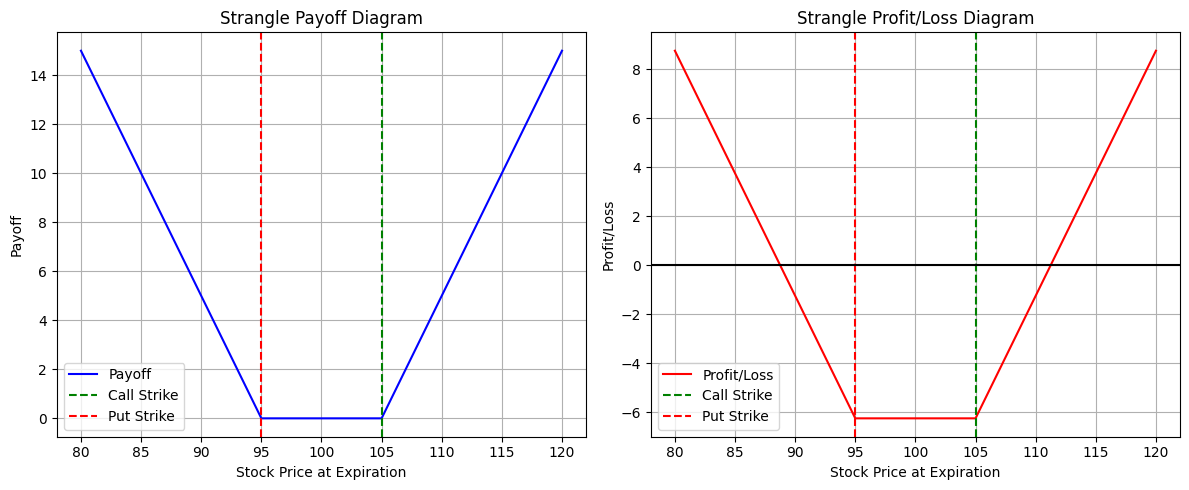

Strangle Strategy Details:
Call Strike: 105, Premium Paid: 3.5
Put Strike: 95, Premium Paid: 2.75
Total Premium Paid: 6.25
Upper Breakeven Point: 111.25
Lower Breakeven Point: 88.75
Maximum Loss: -6.25 (occurs when 95 ≤ stock price ≤ 105)
Maximum Profit:
  - Upside: Unlimited (as stock price rises above 111.25)
  - Downside: Limited to 88.75 (if stock goes to 0)


In [13]:
if __name__ == "__main__":
    # Input parameters
    call_strike = 105    # Strike price for call option (typically higher than current price)
    put_strike = 95      # Strike price for put option (typically lower than current price)
    call_premium = 3.50  # Premium paid for call option
    put_premium = 2.75   # Premium paid for put option
    
    # Generate a range of possible stock prices at expiration
    stock_prices = np.arange(80, 121, 1)
    
    # Calculate and plot
    payoff, profit_loss = strangle_payoff(call_strike, put_strike, call_premium, put_premium, stock_prices)
    plot_strangle(call_strike, put_strike, call_premium, put_premium, stock_prices)
    
    # Print key strategy points
    total_premium = call_premium + put_premium
    upper_breakeven = call_strike + total_premium
    lower_breakeven = put_strike - total_premium
    max_loss = -total_premium
    
    print(f"Strangle Strategy Details:")
    print(f"Call Strike: {call_strike}, Premium Paid: {call_premium}")
    print(f"Put Strike: {put_strike}, Premium Paid: {put_premium}")
    print(f"Total Premium Paid: {total_premium}")
    print(f"Upper Breakeven Point: {upper_breakeven}")
    print(f"Lower Breakeven Point: {lower_breakeven}")
    print(f"Maximum Loss: {max_loss} (occurs when {put_strike} ≤ stock price ≤ {call_strike})")
    print("Maximum Profit:")
    print(f"  - Upside: Unlimited (as stock price rises above {upper_breakeven})")
    print(f"  - Downside: Limited to {put_strike - total_premium} (if stock goes to 0)")